In [175]:
import matplotlib.pyplot as plt
from  math import pow
import numpy
#2D绘图库

In [176]:
#快捷键

#在光标之前增加输入行：ctrl+shift+"-"

#删除光标所在行（包括空行）：esc+“DD”(按D两次)

原始的评分矩阵R为：
 [[5 3 0 1]
 [4 0 0 1]
 [1 1 0 5]
 [1 0 0 4]
 [0 1 5 4]]
经过MF算法填充0处评分值后的评分矩阵R_MF为：
 [[4.98867792 2.94386345 4.6976206  0.99719668]
 [3.96745104 2.34908284 3.91245651 0.99642297]
 [1.07691304 0.81873657 5.13126776 4.95955947]
 [0.96108439 0.71314517 4.1854634  3.97222595]
 [1.82465194 1.21867171 4.90714578 4.0394076 ]]


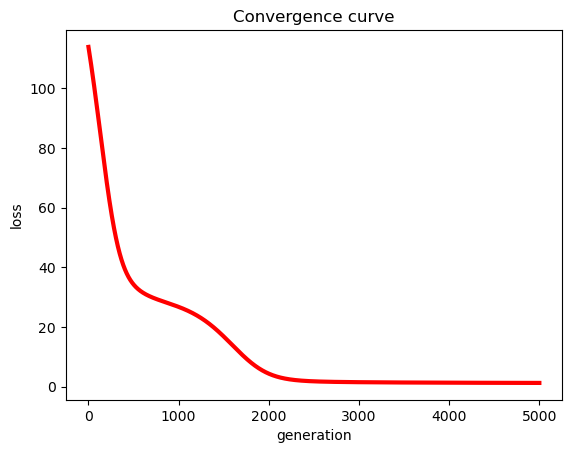

In [179]:
# !/usr/bin/env python
# encoding: utf-8
__author__ = 'Scarlett'
#矩阵分解在打分预估系统中得到了成熟的发展和应用
# from pylab import *
import matplotlib.pyplot as plt
from math import pow
import numpy


def matrix_factorization(R,P,Q,K,steps=5000,alpha=0.0002,beta=0.02):
    Q=Q.T  # .T操作表示矩阵的转置
    result=[]
    for step in range(steps): # 迭代次数5000
        for i in range(len(R)):# R=5*4矩阵 len = 5 = 行
            for j in range(len(R[i])):
                if R[i][j]>0:
                    eij=R[i][j]-numpy.dot(P[i,:],Q[:,j]) # .dot(P,Q) 表示矩阵内积
                    for k in range(K):     # 根据负梯度的方向更新变量：
                        P[i][k]=P[i][k]+alpha*(2*eij*Q[k][j]-beta*P[i][k])
                        Q[k][j]=Q[k][j]+alpha*(2*eij*P[i][k]-beta*Q[k][j])
        eR=numpy.dot(P,Q)
        e=0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j]>0:
                    e=e+pow(R[i][j]-numpy.dot(P[i,:],Q[:,j]),2)
                    for k in range(K):
                        e=e+(beta/2)*(pow(P[i][k],2)+pow(Q[k][j],2))
        result.append(e)
        if e<0.001:
            break
    return P,Q.T,result

if __name__ == '__main__':
    R=[
        [5,3,0,1],
        [4,0,0,1],
        [1,1,0,5],
        [1,0,0,4],
        [0,1,5,4]
    ]

    R=numpy.array(R)

    N=len(R)
    M=len(R[0])
    K=2

    P=numpy.random.rand(N,K) #随机生成一个 N行 K列的矩阵
    Q=numpy.random.rand(M,K) #随机生成一个 M行 K列的矩阵

    nP,nQ,result=matrix_factorization(R,P,Q,K)
    print("原始的评分矩阵R为：\n",R)
    R_MF=numpy.dot(nP,nQ.T)
    print("经过MF算法填充0处评分值后的评分矩阵R_MF为：\n",R_MF)

#-------------损失函数的收敛曲线图---------------

    n=len(result)
    x=range(n)
    plt.plot(x,result,color='r',linewidth=3)
    plt.title("Convergence curve")
    plt.xlabel("generation")
    plt.ylabel("loss")
    plt.show()